## A First Simulation Example on Designing and Assessing a Regression Function

In [1]:
# useful importations
import numpy as np
from sklearn import linear_model
import pandas as pd
from collections import defaultdict
import seaborn as sns
import matplotlib.pyplot as plt

### Generate one small (10 observations) training dataset


In [2]:
# Generate one small (10 observations) training dataset
#np.random.seed(42)
mean=np.zeros(2)
cov = np.eye((2))

data10 = np.random.multivariate_normal(mean,cov,10, tol=0.8)
X,Y = data10[:,0], data10[:,1]

In [3]:
# To have a look at the data
X, Y

(array([ 1.74816986,  0.89618274, -1.34614562, -1.32248109, -0.93792278,
         0.93975591, -2.54915051,  1.12719786, -0.58971019, -0.21989218]),
 array([-1.09681402,  0.1661533 ,  0.0506778 ,  0.50706216,  0.871542  ,
        -0.23900806,  1.27124004,  1.07340977,  1.0416435 ,  0.86303893]))

In [4]:
# To check for the shape
X.shape, Y.shape

((10,), (10,))

### Fit the data to a linear model, calculate the apparent MSE using Residual Sum of Square (RSS)


In [5]:
# Fit the data to a linear model, calculate the apparent MSE using residual sum of square


lm = linear_model.LinearRegression()
lm.fit(X.reshape(-1,1), Y.reshape(-1,1))

pred = lm.predict(X.reshape(-1,1))
mse = np.mean((Y - pred)**2)
print('The apparent MSE using RSS is',mse)

The apparent MSE using RSS is 0.6583017766536448


In [6]:
# To find the coefficient of the linear model
lm.coef_, lm.intercept_

(array([[-0.3187496]]), array([0.37904851]))

### Plot the linear model, the data, and the best regression


In [7]:
## Plot the linear model, the data, and the best regression

# Let's build the dictionary first
dictionary = defaultdict(lambda:0)
dictionary['X'] = X
dictionary['Y'] = Y
data = pd.DataFrame(dictionary)
data.head()

,X,Y
0,1.748170,-1.096814
1,0.896183,0.166153
2,-1.346146,0.050678
3,-1.322481,0.507062
4,-0.937923,0.871542


### Let us define the test function

In [8]:
test_function = lambda x,y: np.mean(y) + (np.cov(y,x)[0][1]/np.var(x)) * (x - np.mean(x))

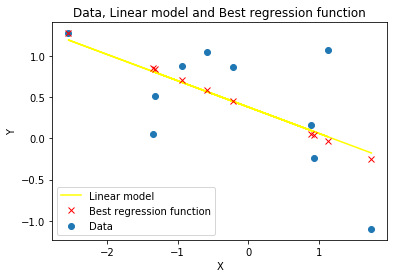

In [9]:
#plot
exp = test_function(X,Y)
#exp = np.mean(Y) + (np.cov(Y,X)[0][1]/np.var(X)) * (X - np.mean(X))

plt.figure()
plt.scatter(data['X'], data['Y'], label='Data')
plt.plot(data['X'], pred, 'yellow', label='Linear model')
plt.plot(data['X'], exp, 'x', color = 'red', label='Best regression function')

plt.title('Data, Linear model and Best regression function')
plt.xlabel("X")
plt.ylabel("Y")
plt.legend()
plt.show()

### To generate a large data set (1000 observations to represent the population) from the same distribution and calculate the true error rate

In [20]:
# To generate a large data set (1000 observations to represent the population) from the same distribution and calculate
#the true error rate

mean=np.zeros(2)
cov = np.eye((2))

data = np.random.multivariate_normal(mean,cov,1000, tol=0.8)
X_large,Y_large = data[:,0], data[:,1]
lm_large = linear_model.LinearRegression()
lm_large.fit(X_large.reshape(-1,1), Y_large.reshape(-1,1))

pred = lm_large.predict(X_large.reshape(-1,1))
err_tr = np.mean((Y_large - pred)**2)
print('The true error rate is', err_tr)

The true error rate is 1.0184034881449326


### To obtain the performance of best regression function


In [21]:
# To obtain the performance of best regression function
exp_large = test_function(X_large,Y_large)
#exp_large = np.mean(X_large) + (np.cov(Y_large,X_large)[0][1]/np.var(X_large)) * (X_large - np.mean(X_large))
err_star = np.mean((Y_large - exp_large)**2)
print('The performance of the best regression model is',err_star)

The performance of the best regression model is 1.0181034093160442


### Do Monte-Carlo (MC) simulation by repeating the above for 500 training sets of the same size (10 observations), with the same large testing set (the 1000 observations)

In [22]:
# Let's generate the testing set
mean = np.zeros(2)
cov = np.eye((2))
test_data = np.random.multivariate_normal(mean, cov, 1000, tol=0.8)
X_test, Y_test = test_data[:,0], test_data[:,1]

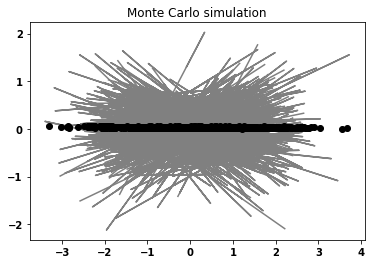

In [23]:
# Monte Carlo simulation

err = list()
mean = np.zeros(2)
cov = np.eye((2))
exp_test = test_function(X_test,Y_test)
#exp_test = np.mean(Y_test) + (np.cov(Y_test,X_test)[0][1]/np.var(X_test)) * (X_test - np.mean(X_test))

for i in range(500):
    train_data = np.random.multivariate_normal(mean,cov,10,tol=0.8)
    
    X_large,Y_large = train_data[:,0], train_data[:,1]
    
    lm_large = linear_model.LinearRegression()
    
    lm_large.fit(X_large.reshape(-1,1), Y_large.reshape(-1,1))

    pred = lm_large.predict(X_large.reshape(-1,1))
    
    err_tr = np.mean((Y_large - pred)**2)
    
    err.append(err_tr)
    
    plt.plot(X_large, pred, 'gray', label='Linear model')


    plt.title('Monte Carlo simulation')

plt.plot(test_data, exp_test, 'o', color='black', label='Best regression function')
plt.rc('font', weight='bold')
plt.show()


### mean and variance of errors

In [24]:
# mean and var of errors
mean_ = np.mean(err)
var_ = np.var(err) 
print('The mean and variance of the errors are {} and {} respectively'.format(mean_, var_))

The mean and variance of the errors are 0.990657887744489 and 0.23708225417195591 respectively


## To repeat 10 more times with different training-set sizes

In [25]:
## To repeat 10 more times
err_sample = list()
var_sample = list()

#testing set
exp_test = test_function(X_test,Y_test)
#np.mean(Y_test) + (np.cov(Y_test,X_test)[0][1]/np.var(X_test)) * (X_test - np.mean(X_test))

#testting error (RME)
err_test = np.mean((Y_test - exp_test)**2)

#Big training loop
train_size = [20, 30, 40, 80, 100, 200, 300, 400, 500, 700,1000]
index = []
for idx, n_tr in enumerate(train_size):
    index.append(idx)
    err = list()
    for i in range(500):
        
        train_data = np.random.multivariate_normal(mean,cov,n_tr,tol=0.8)

        X_large,Y_large = train_data[:,0], train_data[:,1]

        lm_large = linear_model.LinearRegression()

        lm_large.fit(X_large.reshape(-1,1), Y_large.reshape(-1,1))

        pred = lm_large.predict(X_large.reshape(-1,1))

        err_tr = np.mean((Y_large - pred)**2)

        err.append(err_tr)
    err_sample.append(np.mean(err))
    var_sample.append(np.var(err))
    

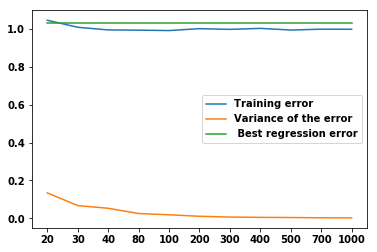

In [27]:
# plot

figure = plt.figure()
axes = figure.add_subplot(111)
axes.plot(index, err_sample, label = 'Training error')
#Variance
axes.plot(index, var_sample, label = 'Variance of the error')

# testing sample error
axes.plot(index, np.ones(len(index))*err_test, label = ' Best regression error')

axes.xaxis.set_ticks(range(11))
axes.xaxis.set_ticklabels(train_size)
axes.legend()
